## Machine Learning Algorithm
    - 지도학습 Supervised Learning
    - 비지도학습 Unsupervised Learning
    - 강화학습 Reinforcement Learning

### 지도학습 Supervised Learning

#### k-NN(k-Nearest Neighbor)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # classifier : 분류기

$$
    \begin{pmatrix}
    1 & 2 \\
    2 & 3 \\
    3 & 4 \\
    6 & 7 \\
    7 & 8 \\
    8 & 9 \\
    \end{pmatrix}
$$

In [69]:
# x_train = np.array([
#     [1,2],
#     [2,3],
#     [3,4],
#     [6,7],
#     [7,8],
#     [8,9]
# ])

# 모델 훈련용 데이터
x_train = np.array([[i,i+1] for i in range(1,9) if i not in (4,5)])
y_train = np.array([0,0,0,1,1,1])  # labeling

In [70]:
# 모델 테스트용 데이터
x_test = np.array([[5,4]])

In [71]:
# k-NN setting
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
# test
predicted_label = knn.predict(x_test)

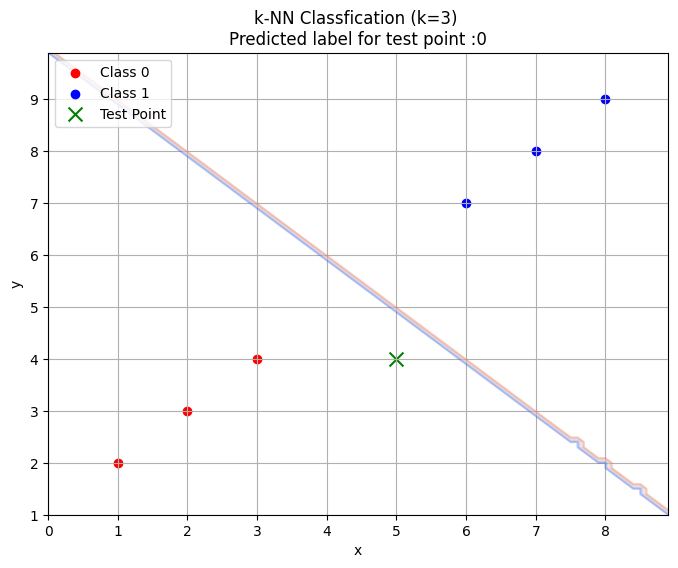

In [73]:
plt.figure(figsize=(8,6))
for i, point in enumerate(x_train):
    plt.scatter(point[0],point[1], c='r' if y_train[i]==0 else 'b', marker='o',
                label = 'Class 0' if y_train[i]== 0 and i == 0 else('Class 1' if y_train[i]==1 and i==3 else ''))

plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max,0.1))

z= knn.predict(np.c_[xx.ravel(), yy.ravel()])
z= z.reshape(xx.shape)

plt.contour(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"k-NN Classfication (k={k}) \nPredicted label for test point :{predicted_label[0]}")
plt.grid(True)
plt.show()

### SVM (Suppor Vector Machine)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [75]:
# 복잡한 샘플 생성
x_train, y_train = make_blobs(n_samples=100, centers=2, random_state = 42, cluster_std=2)

# 테스트 데이터
x_test = np.array([[0,0]])

In [76]:
# 모델생성
svm_model = svm.SVC() # kernel='linear'
svm_model.fit(x_train,y_train) 

SVC()

In [77]:
# 예측
predicted_label = svm_model.predict(x_test)

In [85]:
# 시각화 함수
def scatter_vis(x_train, y_train, x_test, model, figsize=(6,6)):
    """_summary_

    Args:
        x_train (_type_): _description_     훈련데이터 셋
        y_train (_type_): _description_     훈련데이터레이블
        x (_type_): _description_           테스트용 데이터
        model (_type_): _description_       만든 머신러닝 모델 작성
        figsize (tuple, optional): _description_. Defaults to (6,6).
    """
    plt.figure(figsize=(10,6))
    for i, point in enumerate(x_train):
        plt.scatter(point[0],point[1], c='r' if y_train[i]== 0 else 'b', marker='o',
                    label = 'Class 0' if y_train[i]== 0 and i == 0 else('Class 1' if y_train[i]==1 and i==1 else ''))

    plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

    x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
    y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max,0.1))
    z= model.predict(np.c_[xx.ravel(), yy.ravel()])
    z= z.reshape(xx.shape)

    return xx, yy, z

# scatter_vis(x_train, y_train, x_test, svm_model, figsize=(6,6))

# # 각각 모델에 맞춰 plt
# plt.contour(xx, yy, z, levels = [0], linewidths=2, colors='k')
# plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors = 'none', edgecolors='k',
#             label="Support Vectors")

# plt.legend()
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title(f"SVM Classfication \nPredicted label for test point :{predicted_label[0]}")
# plt.grid(True)
# plt.show()


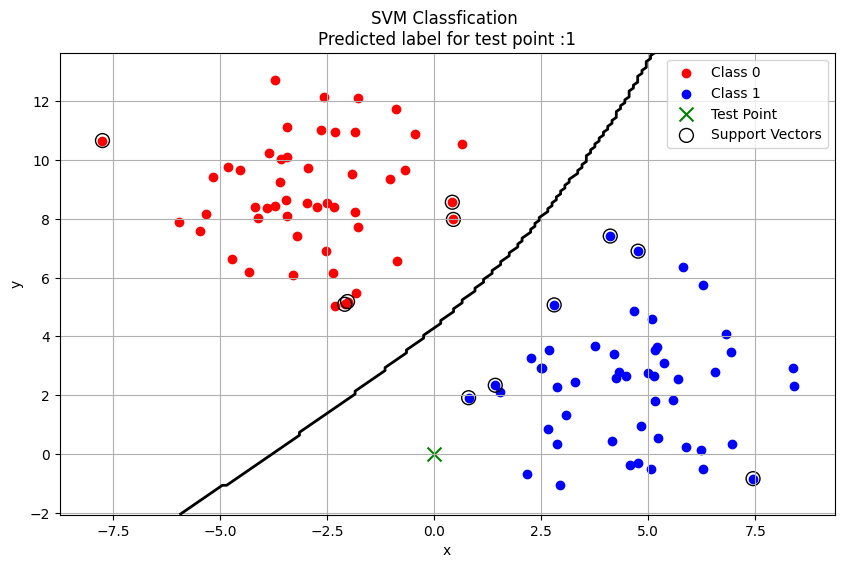

In [65]:
# 시각화
plt.figure(figsize=(10,6))
for i, point in enumerate(x_train):
    plt.scatter(point[0],point[1], c='r' if y_train[i]== 0 else 'b', marker='o',
                label = 'Class 0' if y_train[i]== 0 and i == 0 else('Class 1' if y_train[i]==1 and i==1 else ''))

plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max,0.1))

z= svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
z= z.reshape(xx.shape)

plt.contour(xx, yy, z, levels = [0], linewidths=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], s=100, facecolors = 'none', edgecolors='k',
            label="Support Vectors")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"SVM Classfication \nPredicted label for test point :{predicted_label[0]}")
plt.grid(True)
plt.show()

### Decision Tree

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [81]:
# 복잡한 샘플 데이터 생성
x_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 테스트 데이터
x_test = np.array([[0,0]])

In [82]:
# DC tree 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
# 예측
predicted_label = tree_model.predict(x_test)

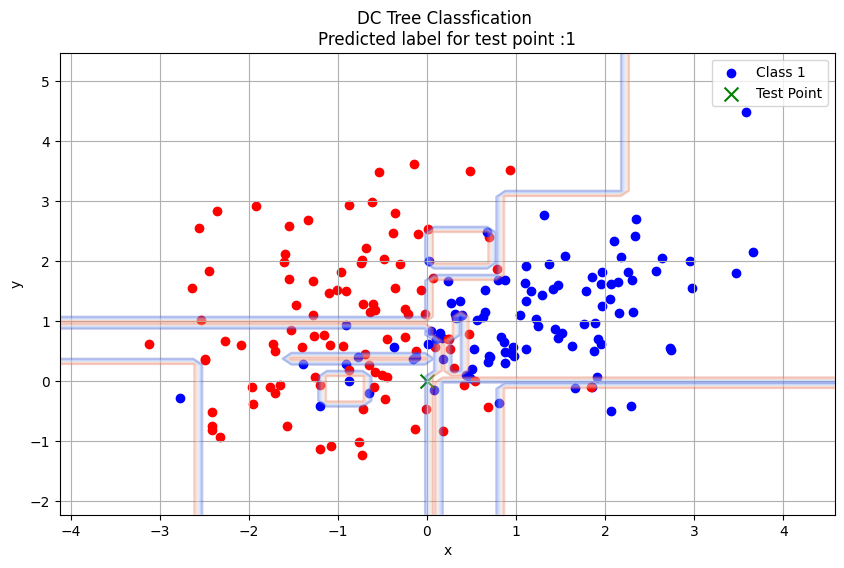

In [88]:
# 시각화
plt.figure(figsize=(12,8))
plt.contour(scatter_vis()alpha=0.3, cmap=plt.cm.coolwarm) # xx,yy,z,

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"DC Tree Classfication \nPredicted label for test point :{predicted_label[0]}")
plt.grid(True)
plt.show()


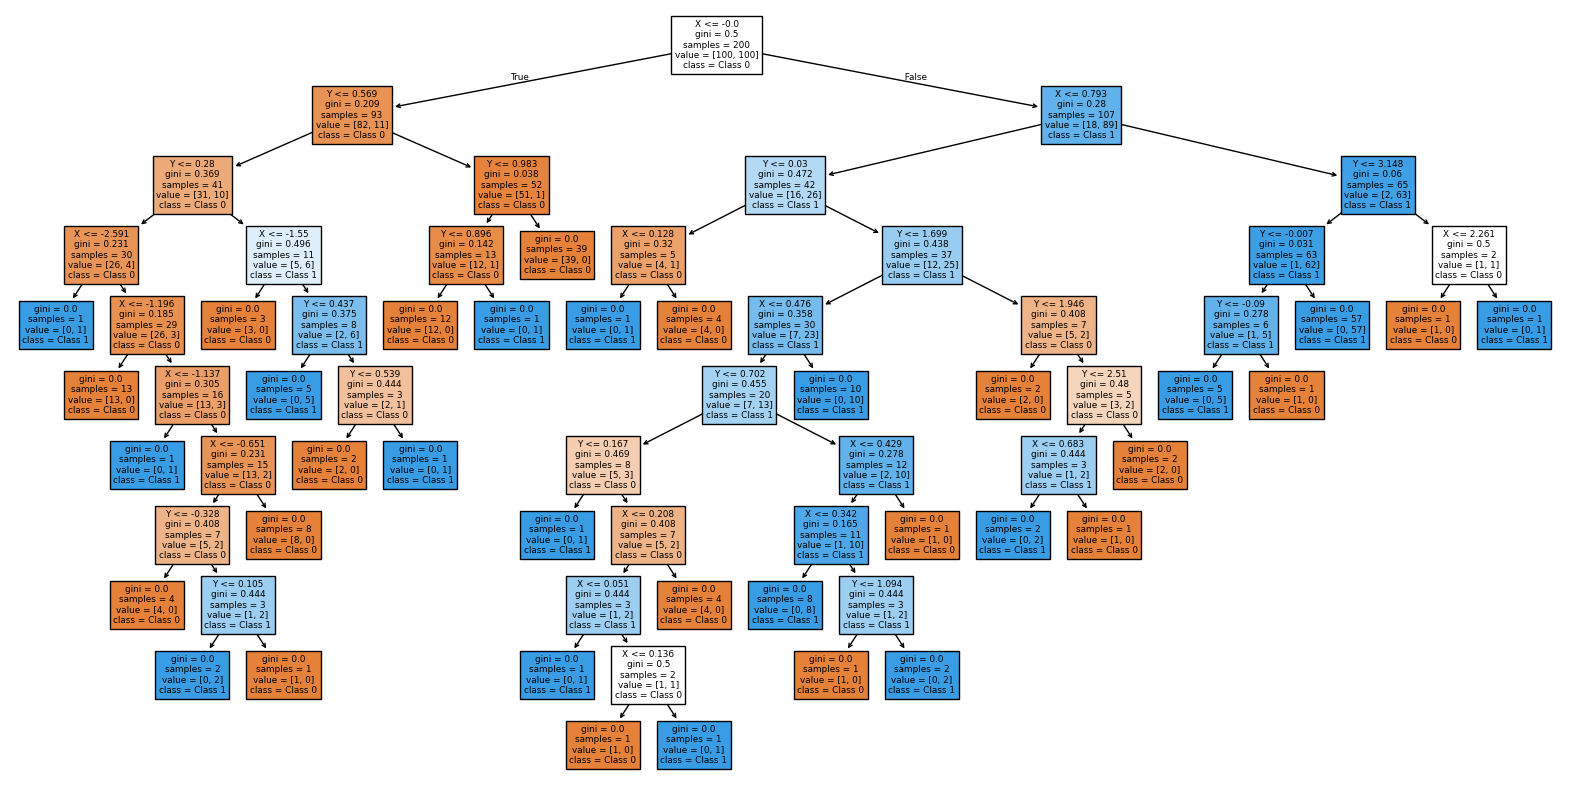

In [91]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=['X','Y'], class_names = ['Class 0', 'Class 1'])
plt.show()

### 비지도학습 Unsupervised Learning

### k-means clustering
    - k : 군집의 개수

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [94]:
# 데이터 불러오기
iris = load_iris()
X = iris.data

In [95]:
# 데이터 전처리  스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
# 모델생성
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [98]:
# PCA (Principle Componant Analysis, 주성분분석)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

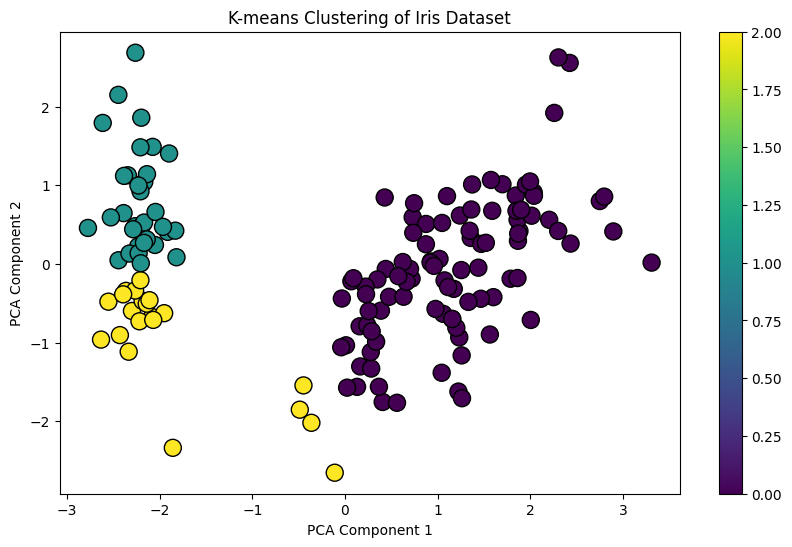

In [103]:
labels = kmeans.labels_  # label이 아닌 cluster 값

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', edgecolor='k', s = 150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [110]:
# random data로 clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

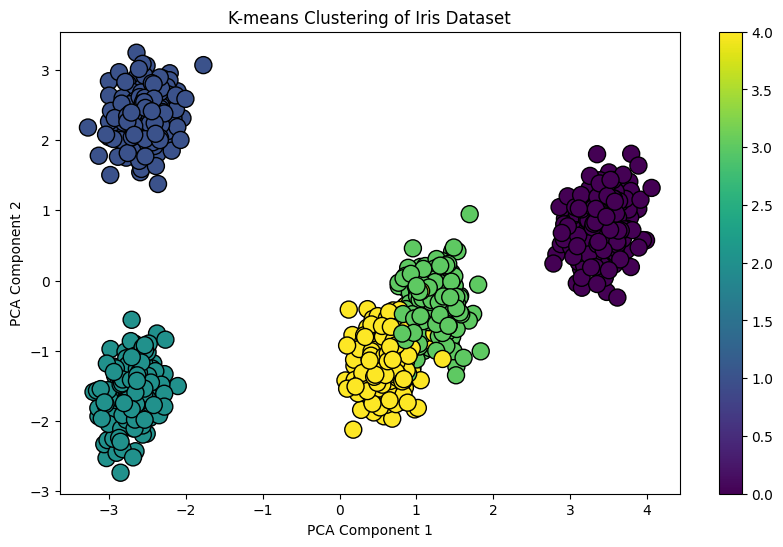

In [111]:
# 데이터 생성
n_samples = 1000
n_features = 10
n_clusters = 5
x, y = make_blobs(n_samples= n_samples, n_features = n_features, centers = n_clusters, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# K means clustering
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', edgecolor='k', s = 150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show() 